In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [10]:
import functools
import matplotlib.pyplot as plt

def save_plot(filename, dpi=300):
    def decorator(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            # Call the original plotting function
            result = func(*args, **kwargs)

            # Save the plot
            plt.savefig(filename, dpi=dpi)  # Adjust dpi as needed

            # Show the plot
            plt.show()

            return result

        return wrapper
    return decorator


In [54]:
# df = pd.read_excel("data/1.xlsx", skiprows=1)
df = pd.read_excel("data/OPEBF-CONCRETE.xlsx")
df = pd.read_excel("data/HHV data.xlsx")

df.head()

,Moisture content (%),Carbon (%),Hydrogen (%),Oxygen (%),Nitrogen (%),Sulphur (%),Ash content (%),Higher Heating value
0,70.0,48.0,6.4,37.6,2.6,0.4,5.0,5.512
1,6.0,43.5,6.0,44.0,0.3,0.2,6.0,15.800
2,2.0,60.0,7.2,22.8,0.0,0.0,10.0,32.564
3,10.0,55.0,6.6,31.2,4.6,0.2,2.5,17.245
4,20.0,49.5,6.0,42.7,0.2,0.1,1.5,18.608


PairGrid Plot

c:\Users\ireti\anaconda3\envs\py_conda\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
c:\Users\ireti\anaconda3\envs\py_conda\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
c:\Users\ireti\anaconda3\envs\py_conda\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
c:\Users\ireti\anaconda3\envs\py_conda\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=vector, **plot_kwargs)


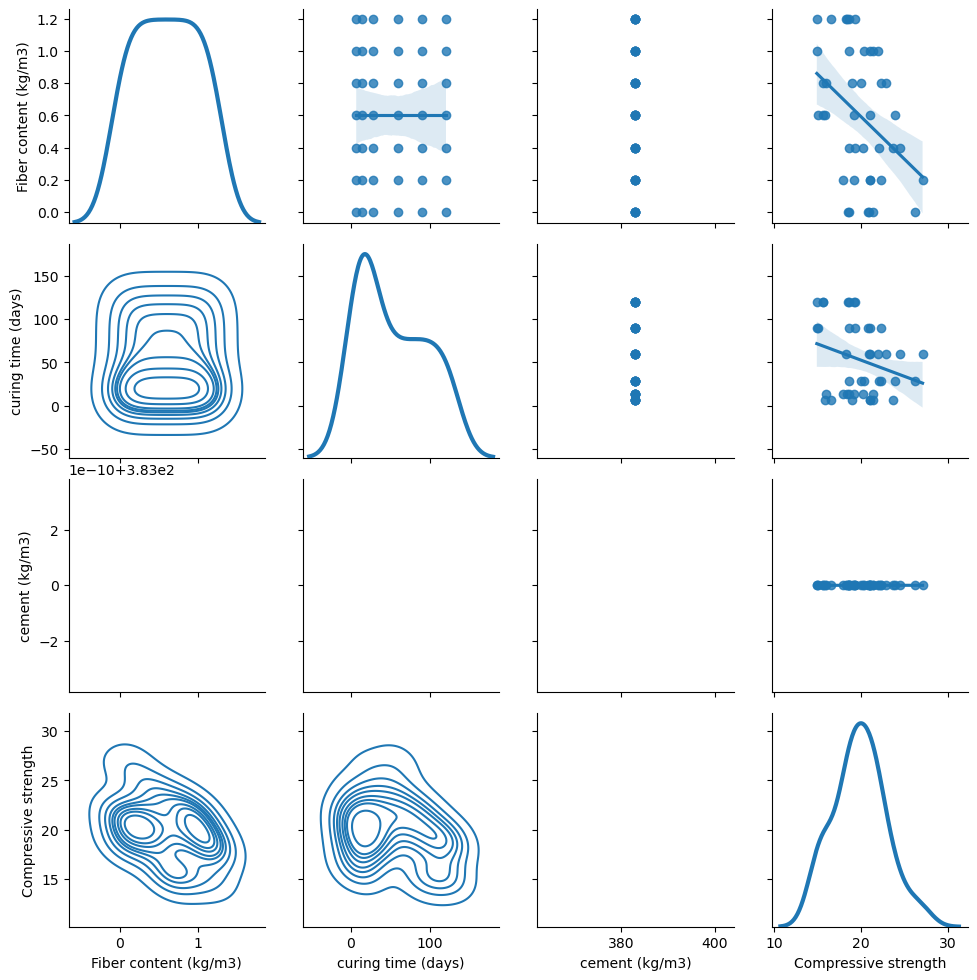

In [3]:
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3)
g.map_upper(sns.regplot)

PairPlot

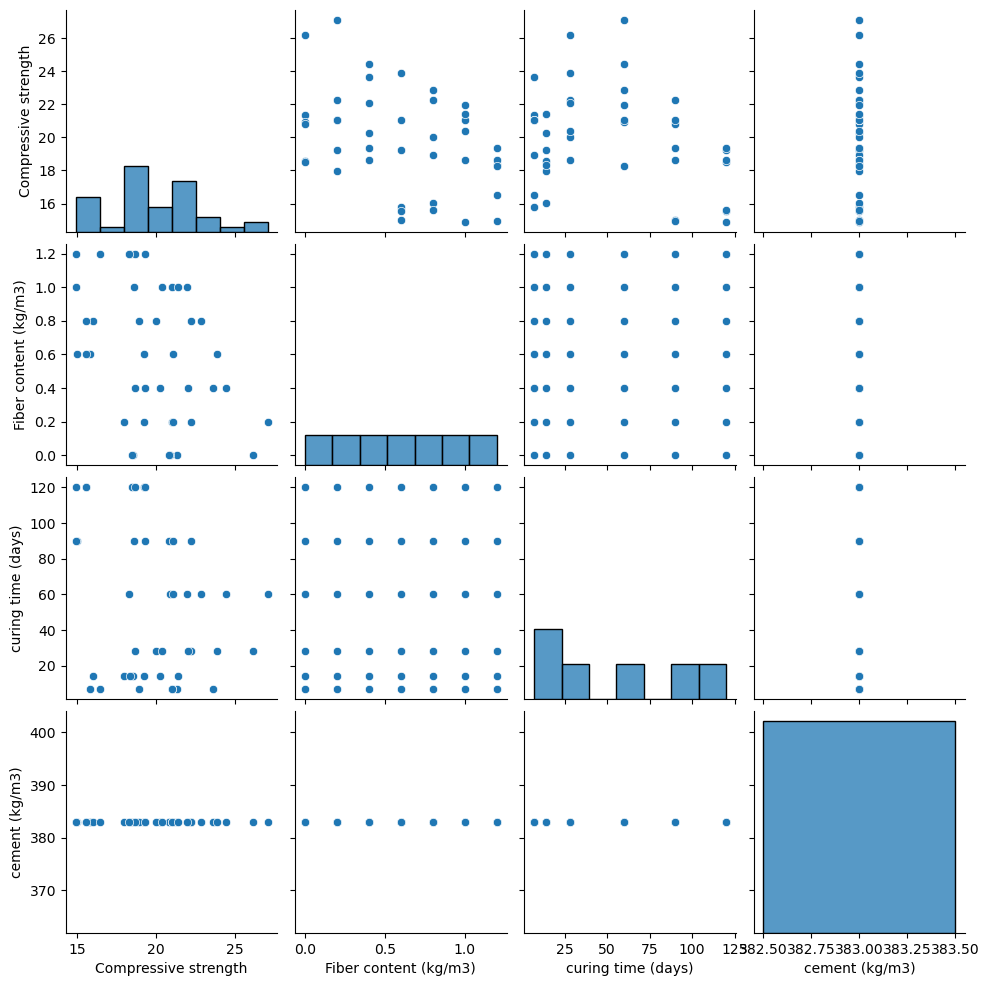

In [4]:
# Select the target variable and input features
target = df.columns[-1]
input_features = df.columns[:-1]

# Combine the target variable and input features into a single DataFrame
pairplot_data = pd.concat([df[target], df[input_features]], axis=1)

# Create a pairplot
sns.pairplot(pairplot_data, kind='scatter')
plt.show()

Correlation Heatmap

<AxesSubplot: >

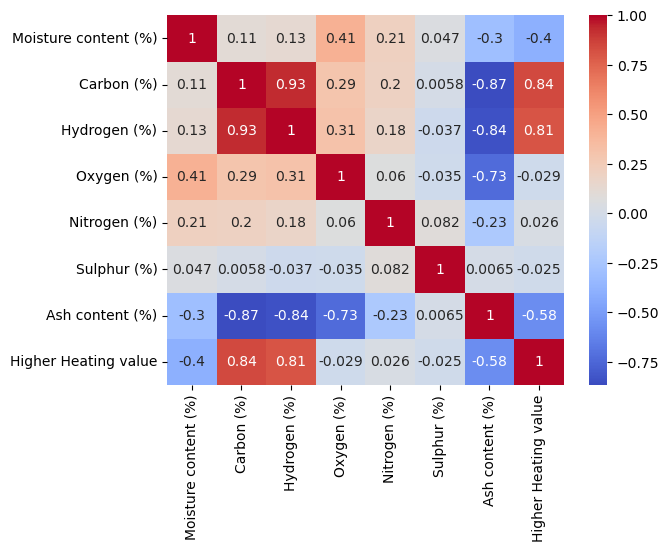

In [25]:
# corr = df.select_dtypes('number').drop(columns=df.columns[-1]).corr()
corr = df.select_dtypes('number').corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')

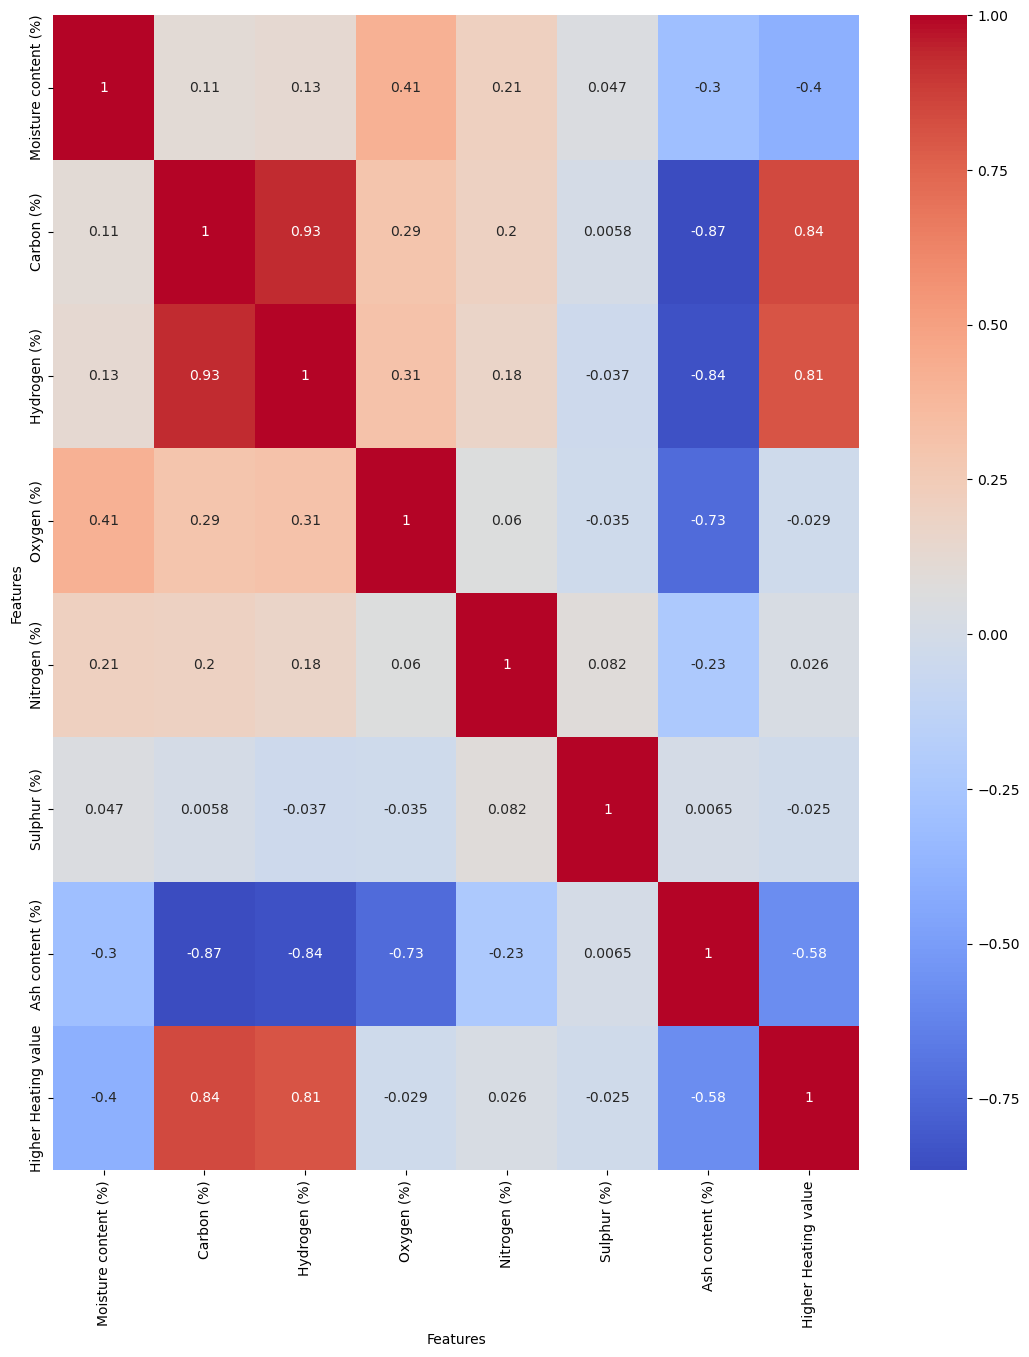

In [31]:
# Save the plot to a file with maximum resolution
# plt.savefig('plots/OPEBF-CONCRETE.png', dpi=300)  # You can increase dpi value for higher resolution

# # Show the plot (optional)
# plt.show()
plt.figure(figsize=(13,15))

@save_plot("plots/HHV")
def plot_corr():
    # feat_imp.plot(kind="barh")
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.xlabel("Features")
    plt.ylabel("Features")

plot_corr()

In [3]:
df_2 = pd.read_excel("data/2.xlsx", skiprows=1)

df_2.head()

,Exposure time,Environment,weight,hardness
0,1,1,20.8000,0.000
1,1,2,20.8000,0.000
2,1,3,20.8000,0.000
3,30,1,20.6521,345.287
4,30,2,20.5900,356.313


pairGrid Plot

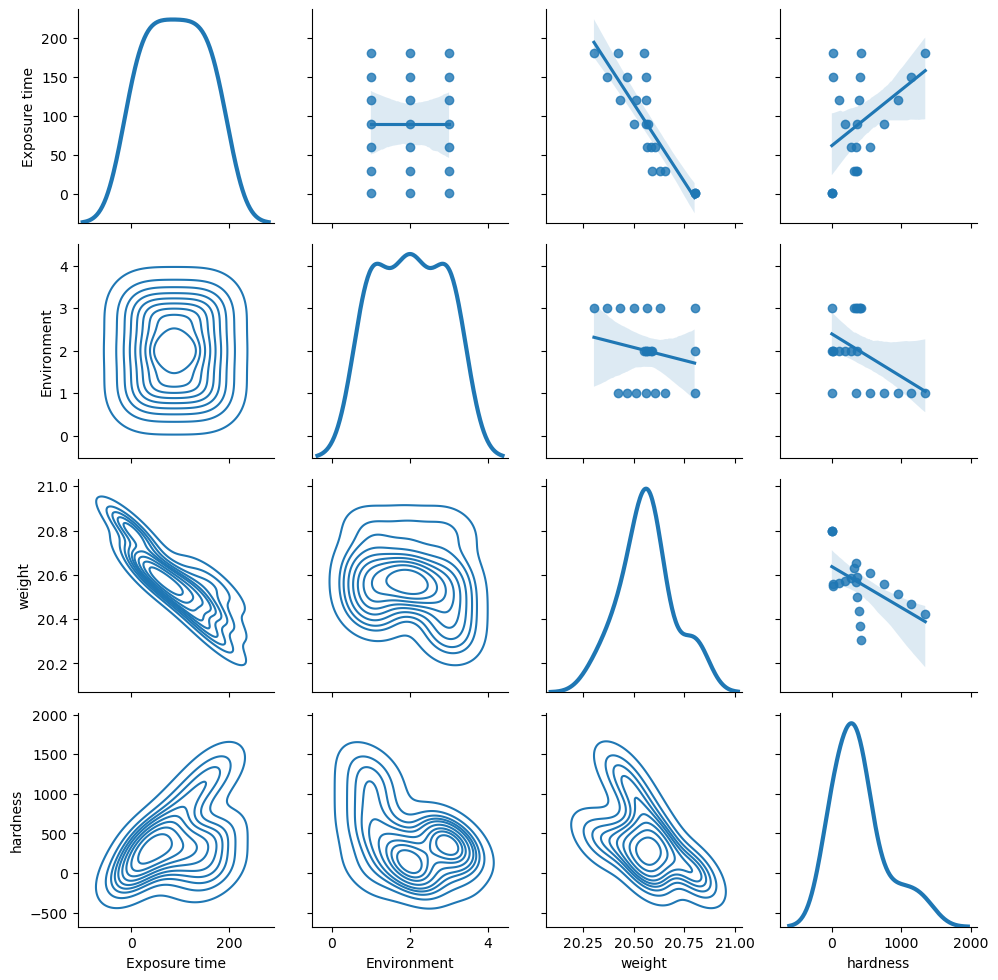

In [9]:
g = sns.PairGrid(df_2, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3)
g.map_upper(sns.regplot)

Pairplot

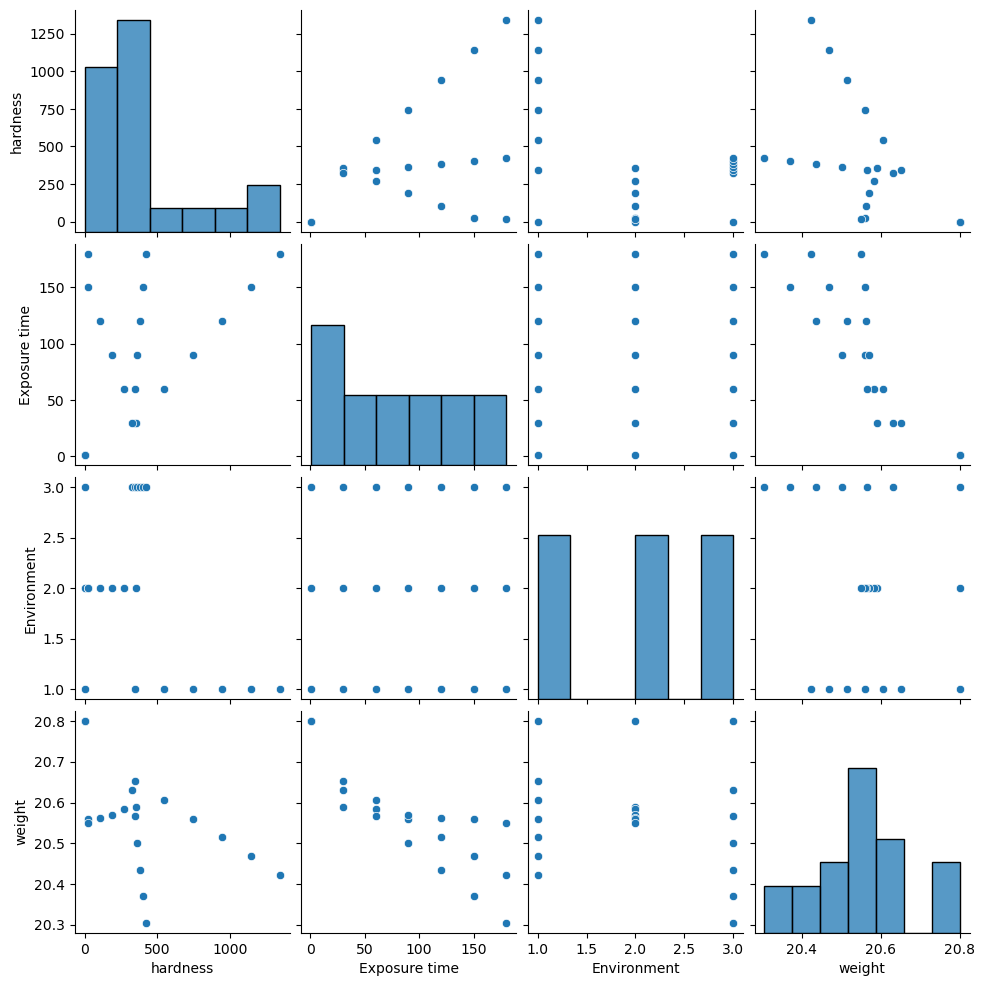

In [12]:
# Select the target variable and input features
target = df_2.columns[-1]
input_features = df_2.columns[:-1]

# Combine the target variable and input features into a single DataFrame
pairplot_data = pd.concat([df_2[target], df_2[input_features]], axis=1)

# Create a pairplot
sns.pairplot(pairplot_data, kind='scatter')
plt.show()

Correlation Heatmap

<AxesSubplot: >

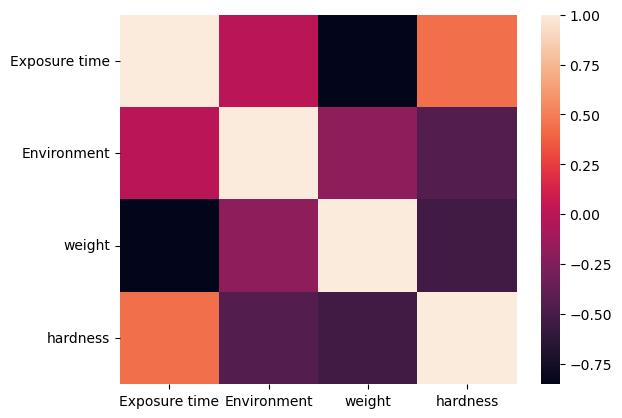

In [5]:
# corr = df_2.select_dtypes('number').drop(columns=df_2.columns[-1]).corr()
corr = df_2.select_dtypes('number').corr()

sns.heatmap(corr)

In [107]:
df = pd.read_excel("data/_1.xlsx")

df.head()

,Ash Content (%),Moisture Content (%),Volatile (%),Fixed Carbon (%),Calorific Value (MJ/Kg)
0,2.86,14.19,71.37,25.77,11.17
1,2.84,14.20,71.34,25.79,11.19
2,2.81,14.10,71.31,25.70,11.16
3,2.89,14.23,71.34,25.81,11.18
4,2.86,14.19,71.37,25.77,11.17


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ash Content (%)          38 non-null     float64
 1   Moisture Content (%)     38 non-null     float64
 2   Volatile (%)             38 non-null     float64
 3   Fixed Carbon (%)         38 non-null     float64
 4   Calorific Value (MJ/Kg)  38 non-null     float64
dtypes: float64(5)
memory usage: 1.6 KB


In [109]:
df['Moisture Content (%)'] = df.apply(lambda x: x['Moisture Content (%)'].replace(' ', '') if isinstance(x['Moisture Content (%)'], str) else x['Moisture Content (%)'], axis=1)

df['Moisture Content (%)'] = df['Moisture Content (%)'].astype('float')

# rename columns
df.columns = ['Ash Content (%)', 'Moisture Content (%)', 'Volatile Matter (%)',
       'Fixed Carbon (%)', 'Calorific Value (MJ/Kg)']
df.dtypes

Ash Content (%)            float64
Moisture Content (%)       float64
Volatile Matter (%)        float64
Fixed Carbon (%)           float64
Calorific Value (MJ/Kg)    float64
dtype: object

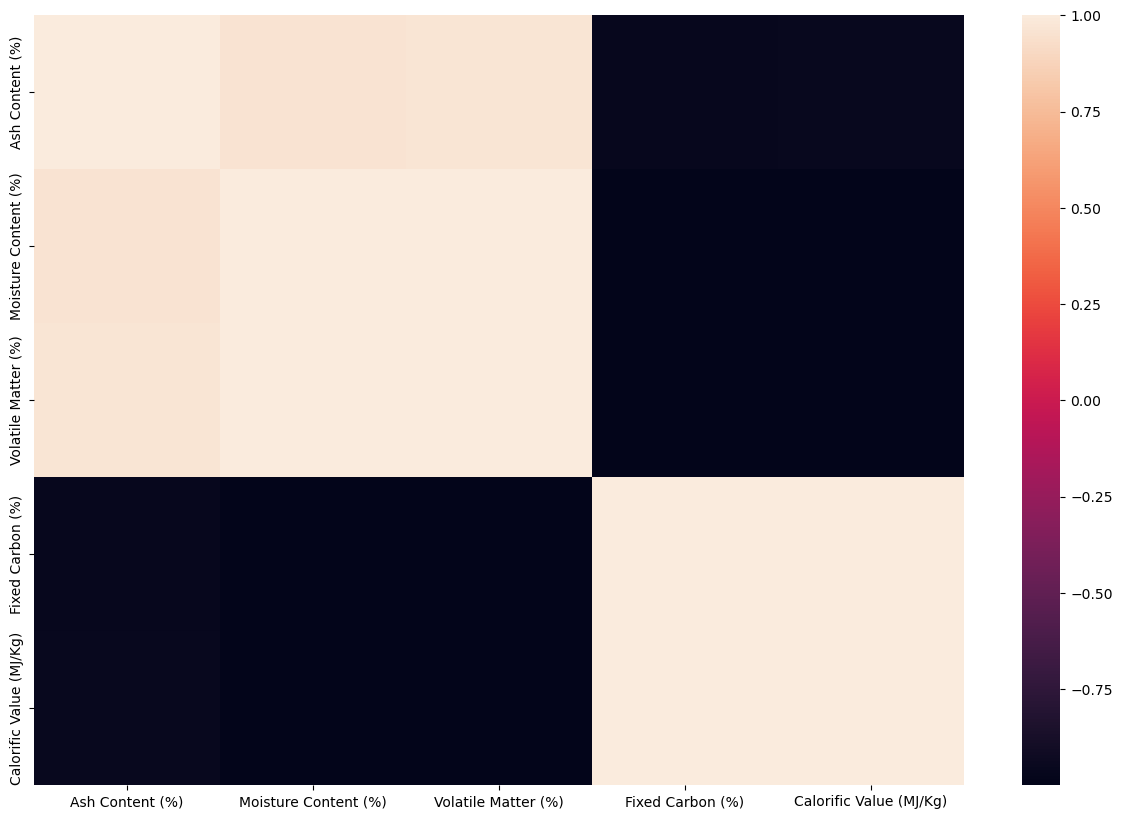

In [110]:
import matplotlib.pyplot as plt

corr = df.select_dtypes('number').corr()


# Set figure size
plt.figure(figsize=(15, 10))  # Adjust the size as needed

sns.heatmap(corr)

# Save the plot
plt.savefig('plots/heatmap_1.png', dpi=900)  # Adjust dpi for high resolution

# Show the plot
plt.show()

In [111]:
corr

,Ash Content (%),Moisture Content (%),Volatile Matter (%),Fixed Carbon (%),Calorific Value (MJ/Kg)
Ash Content (%),1.000000,0.958416,0.963151,-0.960554,-0.954076
Moisture Content (%),0.958416,1.000000,0.997456,-0.995614,-0.992593
Volatile Matter (%),0.963151,0.997456,1.000000,-0.999476,-0.995358
Fixed Carbon (%),-0.960554,-0.995614,-0.999476,1.000000,0.995941
Calorific Value (MJ/Kg),-0.954076,-0.992593,-0.995358,0.995941,1.000000


In [112]:
import functools
import matplotlib.pyplot as plt

def save_plot(filename):
    def decorator(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            # Call the original plotting function
            result = func(*args, **kwargs)

            # Save the plot
            plt.savefig(filename, dpi=300)  # Adjust dpi as needed

            # Show the plot
            plt.show()

            return result

        return wrapper
    return decorator


In [32]:
df.isnull().sum()

Moisture content (%)    0
Carbon (%)              0
Hydrogen (%)            0
Oxygen (%)              0
Nitrogen (%)            0
Sulphur (%)             0
Ash content (%)         0
Higher Heating value    0
dtype: int64

In [55]:
target = df.columns[-1]
y = df[target]
X = df.drop(columns=target)

In [56]:
from sklearn.model_selection import train_test_split

# create a test split with 20% of test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# create a validation split with 20% of val data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [57]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Example with StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline, make_pipeline

# Build Model with a decision tree regression algorithm (avoid multi-collinearity effect from correlated features)
model = make_pipeline(
    # OrdinalEncoder(),
    StandardScaler(),
    DecisionTreeRegressor(max_depth=3, random_state=42)
)
# Fit model to training data
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=3, random_state=42))])

In [59]:
from sklearn.metrics import *

y_pred_training = model.predict(X_train)

print("Training MAE:", mean_absolute_error(y_train, y_pred_training))
print("Training r2:", r2_score(y_train, y_pred_training))

Training MAE: 1.860341980270369
Training r2: 0.9217069240791645


In [60]:
mae_train = mean_absolute_error(y_train, model.predict(X_train))
mae_test = mean_absolute_error(y_test, model.predict(X_test))
mae_val = mean_absolute_error(y_val, model.predict(X_val))
r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))
r2_val = r2_score(y_val, model.predict(X_val))

print("Training MAE:", round(mae_train, 2), "Train R2", round(r2_train,2))
print("Test MAE:", round(mae_test, 2), "Test R2", round(r2_test,2))
print("Val MAE:", round(mae_val, 2), "Val R2", round(r2_val,2))

Training MAE: 1.86 Train R2 0.92
Test MAE: 2.61 Test R2 0.8
Val MAE: 3.93 Val R2 0.82


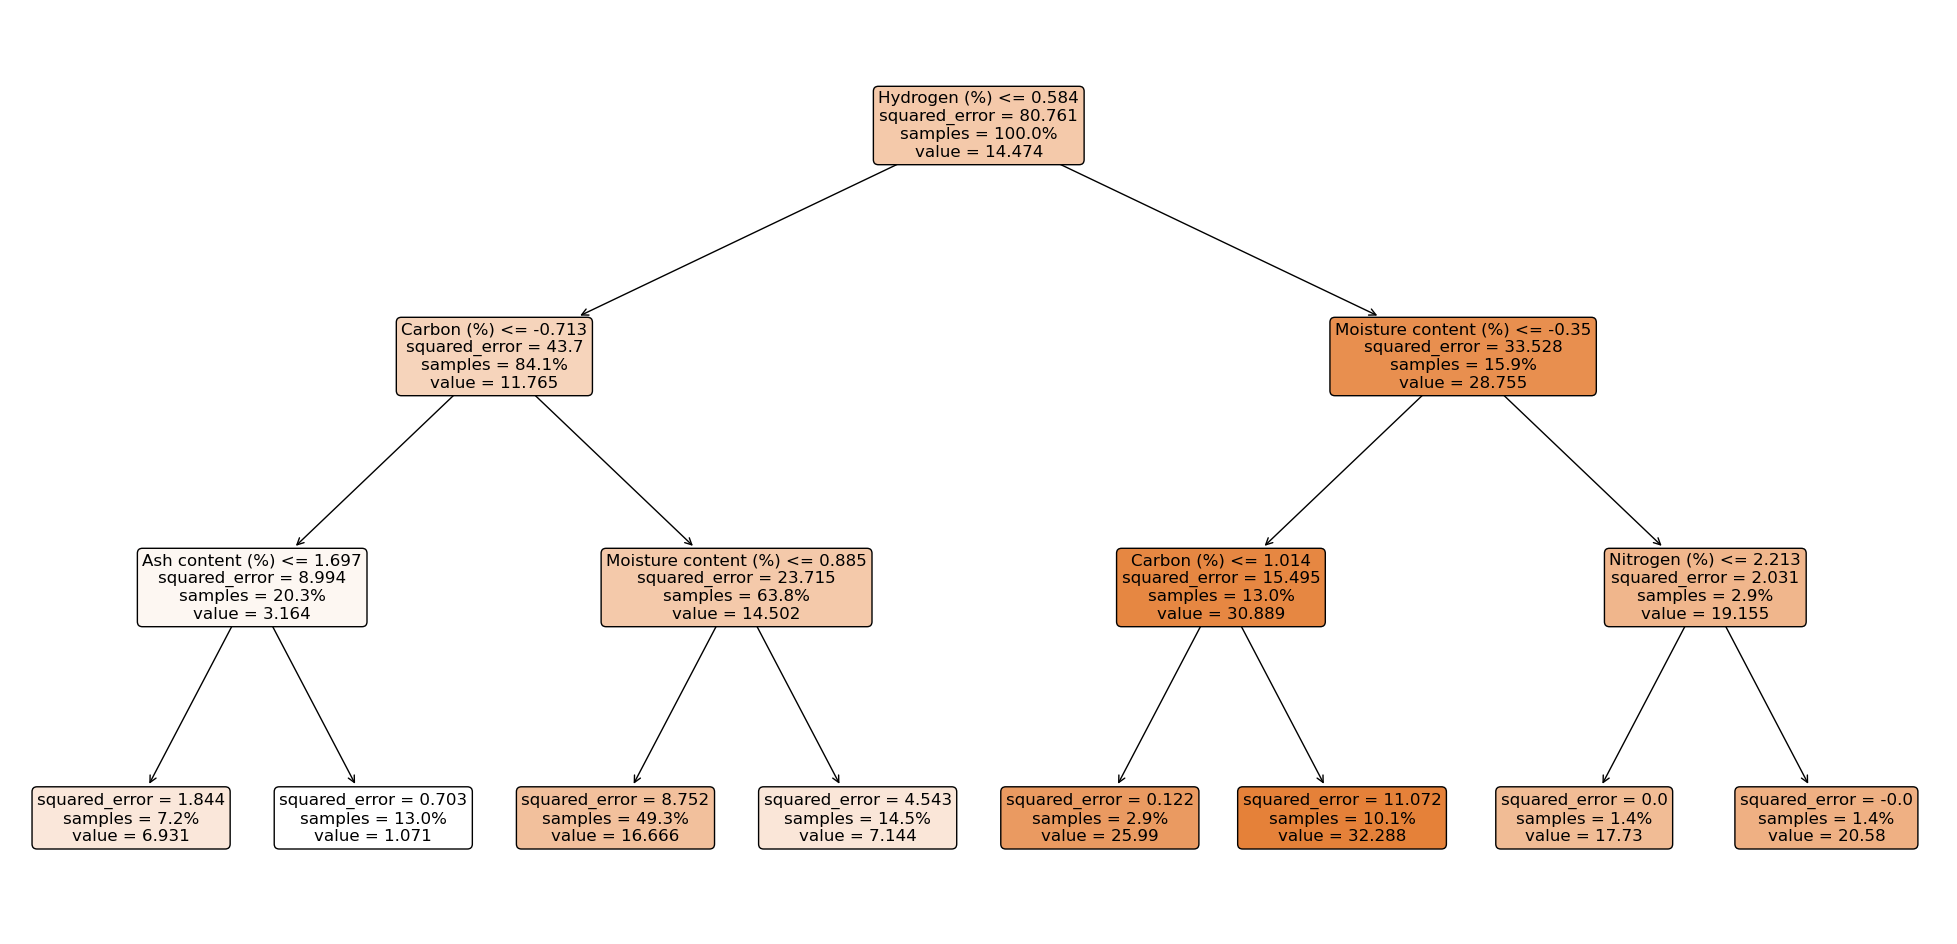

In [39]:
from sklearn.tree import plot_tree

@save_plot('plots/model_HHV')
def plot_model():
    # Create larger figure
    fig, ax = plt.subplots(figsize=(25, 12))
    # Plot tree
    plot_tree(
        decision_tree = model.named_steps["decisiontreeregressor"],
        feature_names=X_train.columns.to_list(),
        filled=True,  # Color leaf with class
        rounded=True,  # Round leaf edges
        proportion=True,  # Display proportion of classes in leaf
        max_depth=3,  # Only display first 3 levels
        fontsize=12,  # Enlarge font
        ax=ax,  # Place in figure axis
    );

plot_model()

In [61]:
# Extract feature importances
features = X_train.columns
importances = model.named_steps["decisiontreeregressor"].feature_importances_

print("Features:", features)
print("Importances:", importances)

Features: Index(['Moisture content (%)', 'Carbon (%)', 'Hydrogen (%)', 'Oxygen (%)',
       'Nitrogen (%)', 'Sulphur (%)', 'Ash content (%)'],
      dtype='object')
Importances: [0.18024341 0.27781087 0.51966759 0.         0.0007907  0.
 0.02148743]


In [64]:
feat_imp = pd.Series(sorted(importances, reverse=False), index=features)
feat_imp.head(10)

Moisture content (%)    0.000000
Carbon (%)              0.000000
Hydrogen (%)            0.000791
Oxygen (%)              0.021487
Nitrogen (%)            0.180243
Sulphur (%)             0.277811
Ash content (%)         0.519668
dtype: float64

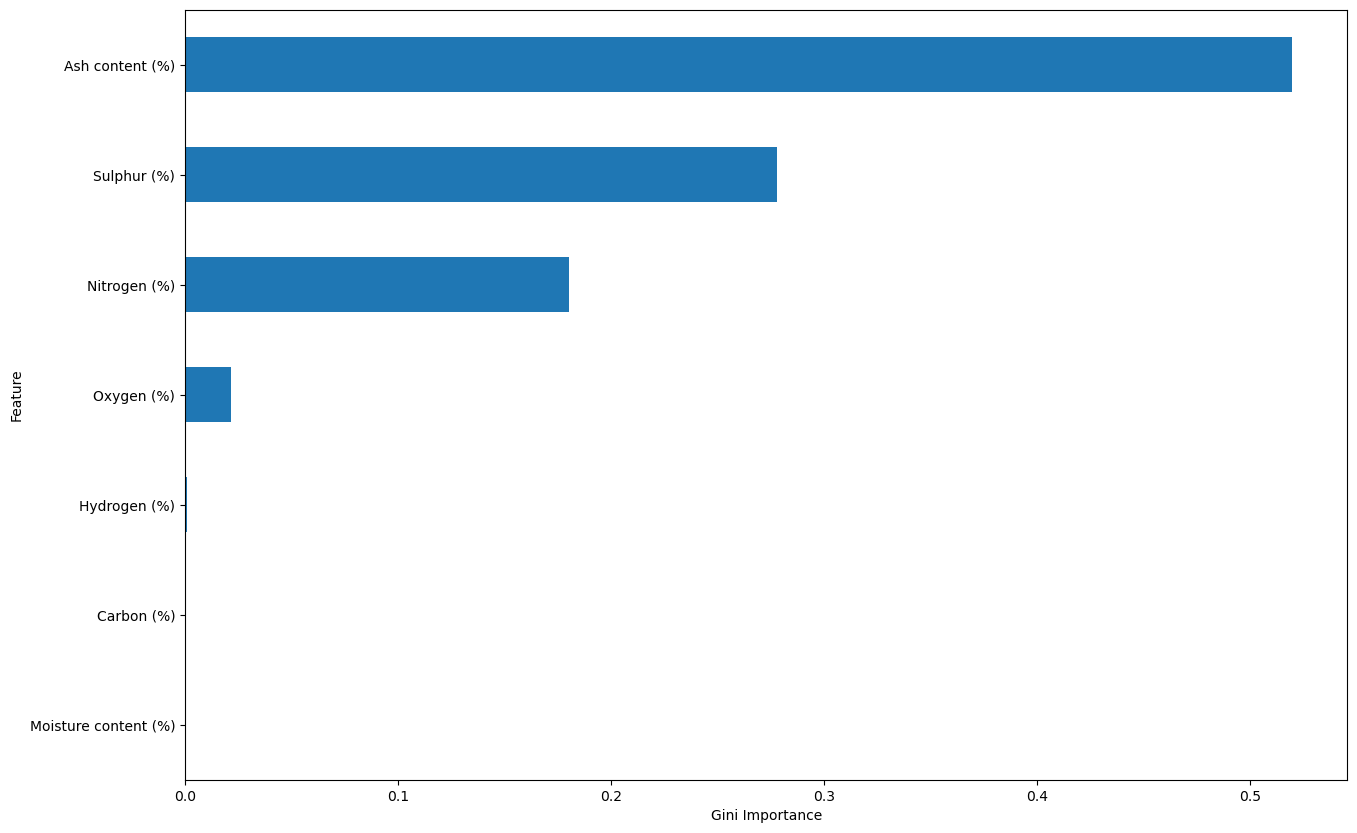

In [63]:
# Create horizontal bar chart
@save_plot("plots/OPEBF-CONCRETE_Plot")
def plot_fi():
    fig, ax = plt.subplots(figsize=(15, 10))
    feat_imp.plot(kind="barh")
    plt.xlabel("Gini Importance")
    plt.ylabel("Feature")

plot_fi()

In [4]:
df_ = pd.read_excel("data/_2.xlsx")

df_.head()

,Ash Content (%),Moisture Content (%),Volatile (%),Fixed Carbon (%),Calorific Value (MJ/Kg)
0,13.00,10.9,67.28,19.72,12.00
1,12.86,11. 08,66.95,20.00,11.92
2,13.04,11.1,67.27,19.69,12.01
3,13.02,10.9,67.20,19.70,12.00
4,12.89,10. 92,66.97,20.00,11.90
